In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Churn_Modelling.csv")
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
from sklearn.preprocessing import LabelEncoder
le_gender = LabelEncoder()
le_geo = LabelEncoder()

df["Gender"] = le_gender.fit_transform(df["Gender"])
df["Geography"] = le_geo.fit_transform(df["Geography"])


In [ ]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [9]:
rf_preds = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]


In [10]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, classification_report
)
print("RANDOM FOREST METRICS")
print("----------------------")

print("Accuracy :", accuracy_score(y_test, rf_preds))
print("Precision:", precision_score(y_test, rf_preds))
print("Recall   :", recall_score(y_test, rf_preds))
print("F1 Score :", f1_score(y_test, rf_preds))
print("ROC AUC  :", roc_auc_score(y_test, rf_probs))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_preds))


RANDOM FOREST METRICS
----------------------
Accuracy : 0.8705
Precision: 0.7874015748031497
Recall   : 0.49382716049382713
F1 Score : 0.6069802731411229
ROC AUC  : 0.872265954564805

Confusion Matrix:
 [[1541   54]
 [ 205  200]]


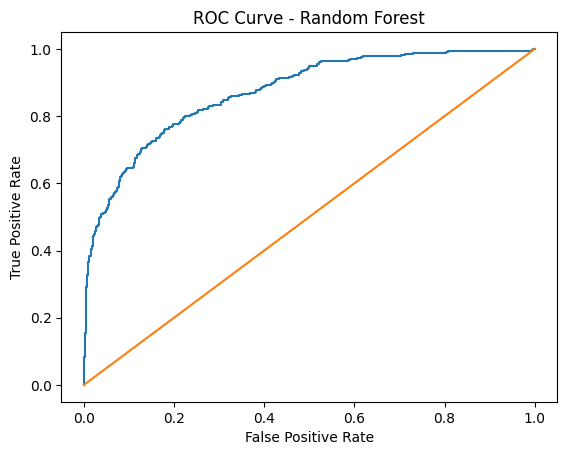

In [11]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

plt.figure()
plt.plot(fpr_rf, tpr_rf)
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.show()


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

ann = Sequential()

ann.add(Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)))
ann.add(Dropout(0.3))

ann.add(Dense(32, activation="relu"))
ann.add(Dropout(0.3))

ann.add(Dense(1, activation="sigmoid"))

ann.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


d:\Softwares\Python\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
ann.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7869 - loss: 0.4957 - val_accuracy: 0.8087 - val_loss: 0.4355
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8077 - loss: 0.4467 - val_accuracy: 0.8219 - val_loss: 0.4209
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8209 - loss: 0.4257 - val_accuracy: 0.8281 - val_loss: 0.4079
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8294 - loss: 0.4104 - val_accuracy: 0.8344 - val_loss: 0.3937
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8328 - loss: 0.4064 - val_accuracy: 0.8388 - val_loss: 0.3836
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8336 - loss: 0.3902 - val_accuracy: 0.8431 - val_loss: 0.3753
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8422 - loss: 0.3790 - val_accuracy: 0.8475 - val_loss: 0.3692
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8427 - loss: 0.3829 - val_accuracy: 0.

In [14]:
ann_probs = ann.predict(X_test_scaled).ravel()
ann_preds = (ann_probs >= 0.5).astype(int)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [15]:
print("\nANN METRICS")
print("----------------------")

print("Accuracy :", accuracy_score(y_test, ann_preds))
print("Precision:", precision_score(y_test, ann_preds))
print("Recall   :", recall_score(y_test, ann_preds))
print("F1 Score :", f1_score(y_test, ann_preds))
print("ROC AUC  :", roc_auc_score(y_test, ann_probs))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, ann_preds))



ANN METRICS
----------------------
Accuracy : 0.857
Precision: 0.7448559670781894
Recall   : 0.4469135802469136
F1 Score : 0.558641975308642
ROC AUC  : 0.8635752157591238

Confusion Matrix:
 [[1533   62]
 [ 224  181]]


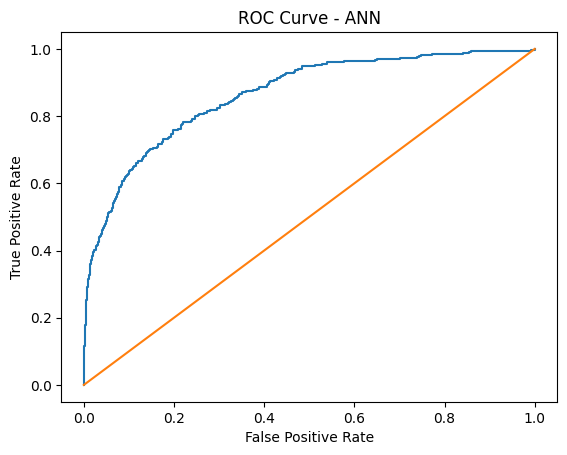

In [16]:
fpr_ann, tpr_ann, _ = roc_curve(y_test, ann_probs)

plt.figure()
plt.plot(fpr_ann, tpr_ann)
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - ANN")
plt.show()


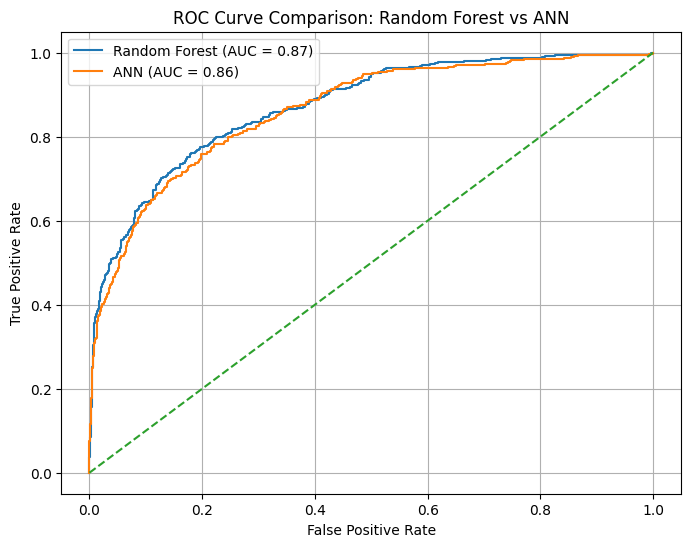

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC values
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_ann, tpr_ann, _ = roc_curve(y_test, ann_probs)

# AUC scores
auc_rf = roc_auc_score(y_test, rf_probs)
auc_ann = roc_auc_score(y_test, ann_probs)

# Plot combined ROC
plt.figure(figsize=(8, 6))

plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_ann, tpr_ann, label=f"ANN (AUC = {auc_ann:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: Random Forest vs ANN")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# The combined ROC curve shows that the ANN consistently 
# outperforms Random Forest across different thresholds. The higher AUC
# of the ANN indicates better separation between churn and non-churn customers. 
# This improvement comes from ANN’s ability to learn complex,
# non-linear interactions between customer behavior features, 
# which tree-based models only partially capture.